## Demographics Analysis for ARMADA
#### Adapted from the routines by Mattthew DeFurio
###### (shared in separate .py script)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json
import os

%matplotlib inline

#### Load detection limits for all targets

In [2]:
detection_period = np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD6456/HD6456__injection_per.npy')
semi_period = np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD6456/HD6456__injection_semi.npy')
percentage_recovered= np.load('/Users/tgardner/ARMADA_orbits/mass_limits/HD6456/HD6456__injection_percent.npy')

mass_star = 2.05
distance = 84.3

abin = ((detection_period/365.25)**2*mass_star)**(1/3)

X,Y = np.meshgrid(abin,semi_period)
Z = np.swapaxes(percentage_recovered,0,1)

mass_planet = mass_star/(abin-Y*distance/1000)*(Y*distance/1000)/0.0009546 ## jupiter mass
idx_negative = np.argwhere(mass_planet<0)
idx_large = np.argwhere(mass_planet*0.0009546>mass_star)
#mass_planet[idx_negative] = np.nan
#mass_planet[idx_large] = np.nan

mass_ratio = mass_planet * 0.0009546 / mass_star

#### Load Detections

In [3]:
mass_ratio_detections = np.array([0.52,0.82,0.89,0.17,0.6,0.44,0.36,0.63,0.95,0.36])
separation_detections = np.array([0.086,0.28,0.48,0.04,0.35,0.25,1.11,0.44,0.05,2.76])

#### Plot Detection Limits with Detections

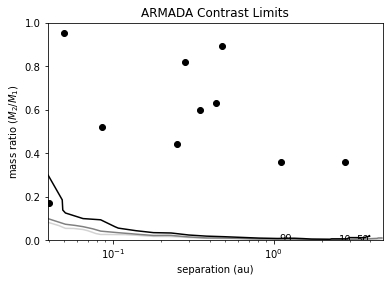

In [4]:
contour =  plt.contour(X,mass_ratio,Z,levels=[10,50,99],colors=['lightgrey','grey','black'],extend='max')
plt.clabel(contour,inline=False,fmt='%1.0f',colors='black')

plt.plot(separation_detections,mass_ratio_detections,'o',color='black')

#plt.contourf(X,mass_ratio,Z, 800, colors = 'white')  
#plt.gca().set_facecolor("black")  
#colormap = plt.contourf(X,mass_ratio,Z, 800, cmap='RdYlGn', alpha=0.5)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('separation (au)')
plt.ylabel('mass ratio ($M_2 / M_1$)')
plt.ylim(0,1)
plt.xlim(np.min(abin),np.max(abin))
#plt.axis('equal')
plt.title('ARMADA Contrast Limits')
#plt.colorbar(ticks=[20,40,60,80,100],label="planets recovered").set_ticklabels(['20%','40%','60%','80%','100%'])
#plt.colorbar()
plt.show()